In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

In [4]:
allergies = pd.read_csv('allergies.csv')
cancer = pd.read_csv('cancer.csv')
careplans = pd.read_csv('careplans.csv')
claims = pd.read_csv('claims.csv')
conditions = pd.read_csv('conditions.csv')
diabetes = pd.read_csv('diabetes.csv')
encounters = pd.read_csv('encounters.csv') ##NOT USING RN, DO WE NEED?
etc = pd.read_csv('etc.csv')
heart = pd.read_csv('heart.csv')
immunizations = pd.read_csv('immunizations.csv')
lungs = pd.read_csv('lungs.csv')
medications = pd.read_csv('medications.csv')
observations = pd.read_csv('observations.csv')
patients = pd.read_csv('patients.csv')
pregnancy = pd.read_csv('pregnancy.csv')
procedures = pd.read_csv('procedures.csv')

Exploring Data by Visualization

In [51]:
careplans #yeah
conditions #yeah
encounters #yeah
immunizations #not best
observations #might be cool to look at our average patient stats
patients #could combine with above to give ethnicity and gender too ^

,patient,birthdate,deathdate,ssn,drivers,passport,prefix,first,last,suffix,maiden,marital,race,ethnicity,gender,birthplace,address
0,4ee2c837-e60f-4c54-9fdf-8686bc70760b,1929-04-08,2029-11-11,999-78-5976,NaN,NaN,NaN,Rosamaria,Pfannerstill,NaN,NaN,NaN,black,dominican,F,Pittsfield MA US,18797 Karson Burgs Suite 444 Palmer Town MA 01...
1,efaf74f9-3de3-45dd-a5d5-26d08e8a3190,2016-12-15,2020-02-19,999-59-9186,NaN,NaN,NaN,Loan,Bashirian,NaN,NaN,NaN,white,american,F,Medford MA US,301 Eula Radial Suite 298 Brockton MA 02305 US
2,aaa4c718-2f48-4c13-9ad0-d287cf280824,1943-11-28,2017-10-22,999-43-3780,S99992928,FALSE,Mr.,Angelo,Buckridge,NaN,NaN,S,black,african,M,Framingham MA US,8693 Fred Crossroad New Bedford MA 02746 US
3,a1851c06-804e-4f31-9d8f-388cd52d4ad0,1954-10-22,2017-10-13,999-53-5542,S99975961,X98167138X,Mrs.,Cami,Terry,NaN,Schuster,M,white,english,F,Hudson MA US,344 Olson Road Apt. 936 Attleboro MA 02703 US
4,48074b70-4db4-4ab0-b9e8-361bd2ba6216,1935-04-08,2017-09-06,999-34-8549,S99997003,X65866752X,Mr.,Giovanni,Russel,NaN,NaN,M,hispanic,puerto_rican,M,Westfield MA US,5780 Corwin Trafficway Dartmouth MA 02714 US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1457,1131717c-e009-446d-b353-0b865cbb4194,1932-01-20,NaN,999-45-9346,S99967647,X18790808X,Mrs.,Seema,McGlynn,NaN,Hilll,M,black,dominican,F,Springfield MA US,4315 Sawayn Port Greenfield Town MA 01302 US
1458,462abede-dc9a-4928-a120-0449155d6ada,1931-10-11,NaN,999-70-4419,S99951366,FALSE,Mrs.,Elenora,Ankunding,NaN,Morissette,M,white,polish,F,Boston MA US,2342 River Oval Suite 439 Berlin MA 01503 US
1459,6e687318-9491-4453-8877-da816d835499,1931-05-22,NaN,999-28-2963,S99954452,FALSE,Mr.,Raymundo,Rau,NaN,NaN,M,white,polish,M,Mashpee MA US,20031 Bailey Keys Apt. 161 Boston MA 02284 US
1460,c0cb1ff4-8fbe-4f93-990d-abf62284cb4d,1931-04-20,NaN,999-18-1247,S99929550,FALSE,Mrs.,Chan,Schaden,NaN,Erdman,M,white,irish,F,Marblehead MA US,1218 Heaney Wall East Longmeadow MA 01028 US


                              DESCRIPTION  count
67                      Stress management    830
34                       Exercise therapy    719
22  Deep breathing and coughing exercises    641
57       Recommendation to avoid exercise    641
60                    Respiratory therapy    641
6                     Antenatal education    609
62                 Routine antenatal care    609
53               Pregnancy diet education    609
27                          Diabetic diet    498
26          Diabetes self management plan    498


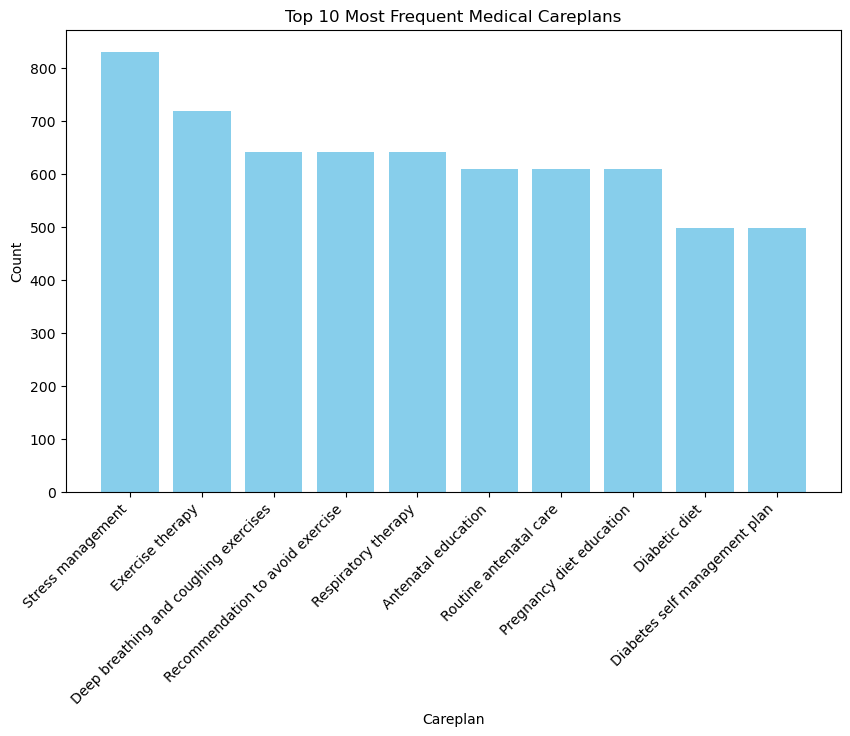

In [52]:
# careplans viz 
careplanCounts = careplans.groupby('DESCRIPTION').size().reset_index(name='count')
careplanCounts = careplanCounts.sort_values(by='count', ascending=False)
top10Careplans = careplanCounts.head(10)
print(top10Careplans)

plt.figure(figsize=(10, 6))
plt.bar(top10Careplans['DESCRIPTION'], top10Careplans['count'], color='skyblue')
plt.xlabel('Careplan')
plt.ylabel('Count')
plt.title('Top 10 Most Frequent Medical Careplans')
plt.xticks(rotation=45, ha='right')
plt.show()

                              DESCRIPTION  count
116            Viral sinusitis (disorder)   1125
3      Acute viral pharyngitis (disorder)    602
2             Acute bronchitis (disorder)    508
86                            Prediabetes    458
52                           Hypertension    373
75                       Normal pregnancy    339
20           Chronic sinusitis (disorder)    329
79                           Otitis media    202
110  Streptococcal sore throat (disorder)    146
85                         Polyp of colon    108


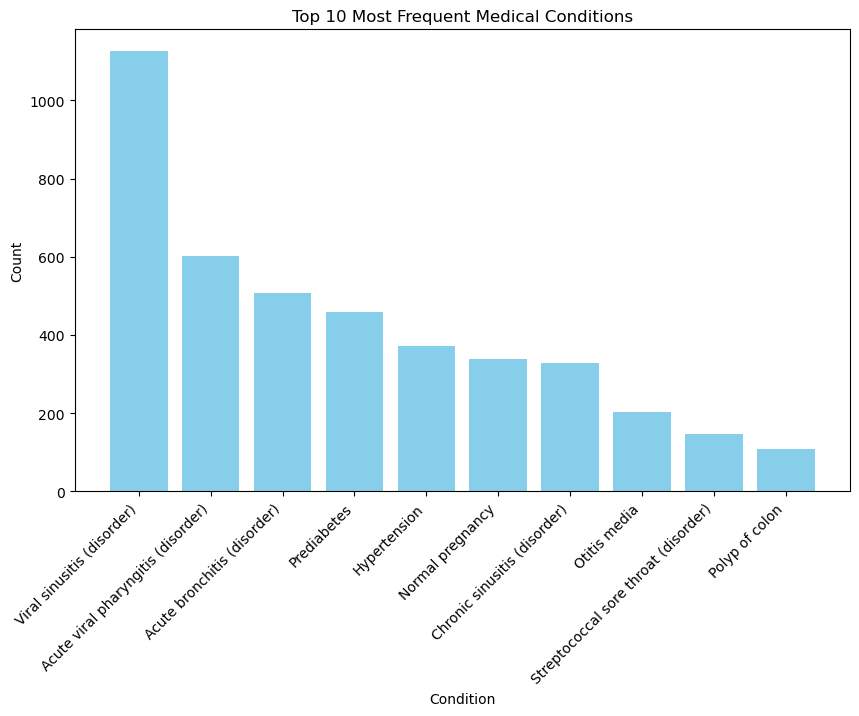

In [53]:
#conditions viz 
conditionsCounts = conditions.groupby('DESCRIPTION').size().reset_index(name='count')
conditionsCounts = conditionsCounts.sort_values(by='count', ascending=False)
top10Conditions = conditionsCounts.head(10)
print(top10Conditions)

plt.figure(figsize=(10, 6))
plt.bar(top10Conditions['DESCRIPTION'], top10Conditions['count'], color='skyblue')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.title('Top 10 Most Frequent Medical Conditions')
plt.xticks(rotation=45, ha='right')
plt.show()

#note that there is some matchup between top 10 careplans and top 10 conditions. this is good bc is expected behavior 

                    DESCRIPTION  count
22         Outpatient Encounter   8629
17        Encounter for symptom   2852
24  Patient encounter procedure   1524
27               Prenatal visit   1383
23         Outpatient procedure   1281
5    Consultation for treatment    899
15     Encounter for 'check-up'    751
13     Emergency room admission    694
16        Encounter for problem    628
6           Death Certification    461


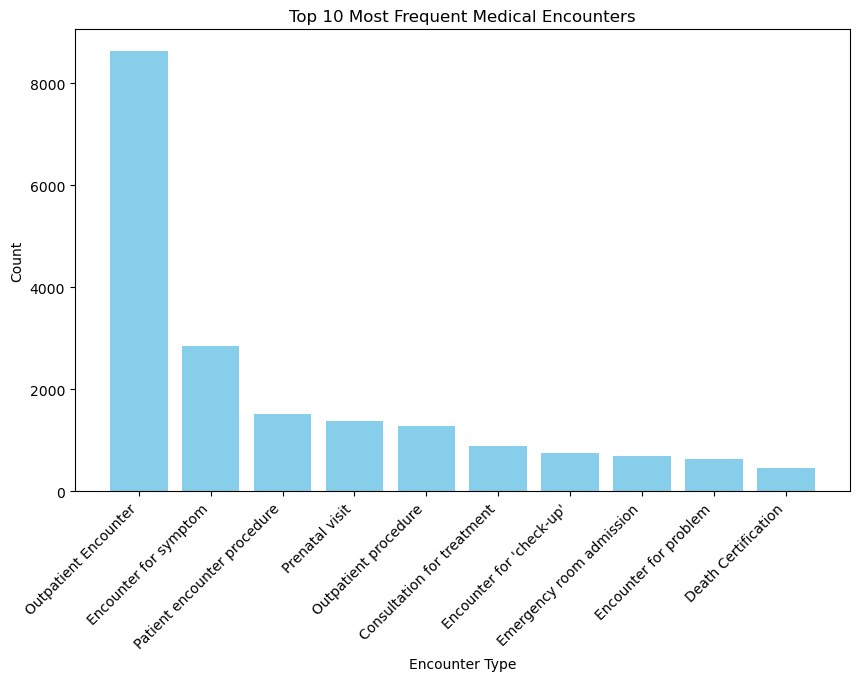

In [54]:
#encounters viz 
encountersCounts = encounters.groupby('DESCRIPTION').size().reset_index(name='count')
encountersCounts = encountersCounts.sort_values(by='count', ascending=False)
top10Encounters = encountersCounts.head(10)
print(top10Encounters)

plt.figure(figsize=(10, 6))
plt.bar(top10Encounters['DESCRIPTION'], top10Encounters['count'], color='skyblue')
plt.xlabel('Encounter Type')
plt.ylabel('Count')
plt.title('Top 10 Most Frequent Medical Encounters')
plt.xticks(rotation=45, ha='right')
plt.show()

In [66]:
#what the 'average' patient looks like in terms of race and gender,, viz?

#find most frequent race to represent average
patientRaceCount = patients.groupby('race').size().reset_index(name='raceCount')
patientRaceCount = patientRaceCount.sort_values(by='raceCount', ascending=False)
top5FreqRace = patientRaceCount.head(5)
print(top5FreqRace)

#repeat for gender
patientGenderCount = patients.groupby('gender').size().reset_index(name='genderCount')
patientGenderCount = patientGenderCount.sort_values(by='genderCount', ascending=False)
top5FreqGender = patientGenderCount.head(5)
print(top5FreqGender)

#repeat for ethnicity ? i dont find this super meaningful
# patientEthnicityCount = patients.groupby('ethnicity').size().reset_index(name='ethnicityCount')
# patientEthnicityCount = patientEthnicityCount.sort_values(by='ethnicityCount', ascending=False)
# top5FreqEthnicity = patientEthnicityCount.head(5)
# print(top5FreqEthnicity)

       race  raceCount
3     white       1085
2  hispanic        155
1     black        129
0     asian         93
  gender  genderCount
1      M          741
0      F          721


In [122]:
#visualization for what the 'average' patient looks like in terms of body stat characteristics
#want to create a radar chart but having a hard time eek
observationsRadar = observations.drop(columns = ['DATE', 'PATIENT', 'ENCOUNTER', 'CODE', 'UNITS'])
observationsRadar = observationsRadar.dropna()
observationsRadar['VALUE'] = pd.to_numeric(observationsRadar['VALUE'], errors='coerce')
averageVals = observationsRadar.groupby('DESCRIPTION')['VALUE'].mean().reset_index()
averageVals = averageVals[averageVals['DESCRIPTION'].isin(['Body Height', 'Body Weight', 'Body Mass Index', 'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Quality adjusted life years'])]
#averageVals = averageVals.transpose()
averageVals


,DESCRIPTION,VALUE
3,Body Height,145.246010
4,Body Mass Index,27.837863
5,Body Weight,65.032186
16,Diastolic Blood Pressure,84.485896
40,Quality adjusted life years,41.901321
45,Systolic Blood Pressure,129.587277


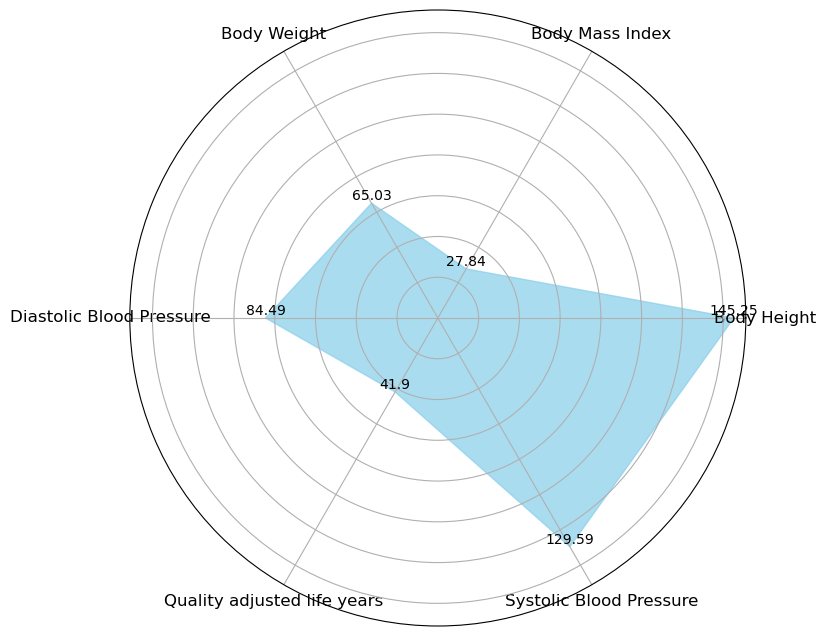

In [128]:
#CREATION OF RADAR CHART OBTAINED FROM ONLINE CODE 
descriptions = averageVals['DESCRIPTION'].tolist()
values = averageVals['VALUE'].tolist()

#to close the circle
values.append(values[0])

num_vars = len(descriptions)

#compute angle for each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

#need to "complete the loop" and append the start value to the end since plot is a cirlce
values += values[:1]
angles += angles[:1]
values.pop()

#plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.fill(angles, values, color='skyblue', alpha=0.7)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(descriptions, fontsize=12)

ax.set_yticklabels([])

#add values to each point
for angle, value in zip(angles[:-1], values[:-1]):
    ax.text(angle, value, str(round(value, 2)), ha='center', va='bottom', fontsize=10)

plt.show()

In [5]:
lungs.columns

Index(['PATIENT', 'Acute allergic reaction_CONDITIONS',
       'Acute bacterial sinusitis (disorder)_CONDITIONS',
       'Acute bronchitis (disorder)_CONDITIONS',
       'Acute viral pharyngitis (disorder)_CONDITIONS',
       'Alzheimer's disease (disorder)_CONDITIONS',
       'Antepartum eclampsia_CONDITIONS', 'Appendicitis_CONDITIONS',
       'Asthma_CONDITIONS', 'Atopic dermatitis_CONDITIONS',
       ...
       'Sodium_OBSERVATIONS', 'Soybean IgE Ab in Serum_OBSERVATIONS',
       'Systolic Blood Pressure_OBSERVATIONS',
       'Total Cholesterol_OBSERVATIONS', 'Total score [MMSE]_OBSERVATIONS',
       'Triglycerides_OBSERVATIONS', 'Urea Nitrogen_OBSERVATIONS',
       'Walnut IgE Ab in Serum_OBSERVATIONS',
       'Wheat IgE Ab in Serum_OBSERVATIONS',
       'White oak IgE Ab in Serum_OBSERVATIONS'],
      dtype='object', length=452)

In [8]:
lungs.head()

,PATIENT,Acute allergic reaction_CONDITIONS,Acute bacterial sinusitis (disorder)_CONDITIONS,Acute bronchitis (disorder)_CONDITIONS,Acute viral pharyngitis (disorder)_CONDITIONS,Alzheimer's disease (disorder)_CONDITIONS,Antepartum eclampsia_CONDITIONS,Appendicitis_CONDITIONS,Asthma_CONDITIONS,Atopic dermatitis_CONDITIONS,...,Sodium_OBSERVATIONS,Soybean IgE Ab in Serum_OBSERVATIONS,Systolic Blood Pressure_OBSERVATIONS,Total Cholesterol_OBSERVATIONS,Total score [MMSE]_OBSERVATIONS,Triglycerides_OBSERVATIONS,Urea Nitrogen_OBSERVATIONS,Walnut IgE Ab in Serum_OBSERVATIONS,Wheat IgE Ab in Serum_OBSERVATIONS,White oak IgE Ab in Serum_OBSERVATIONS
0,00341a88-1cc1-4b39-b0f9-05b0531991a0,0,1,0,0,0,0,0,1,1,...,0.0,0.0,466.0,574.0,0.0,430.0,0.0,0.0,0.0,0.0
1,0318fe27-553c-468b-99fd-3272b0407f33,0,0,0,0,0,1,0,1,0,...,0.0,0.0,643.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0419b689-ddaa-45aa-abdc-64e321cb5c03,0,0,0,0,0,0,0,1,0,...,1257.0,0.0,1479.0,552.0,0.0,403.0,127.0,0.0,0.0,0.0
3,0a356517-c3d5-4b8e-8429-1898e22e2291,0,0,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0b763e21-2a8f-4f04-86d2-f7e8f9cebb21,0,0,0,1,0,0,0,1,0,...,1394.0,0.0,1772.0,354.0,0.0,261.0,127.0,0.0,0.0,0.0


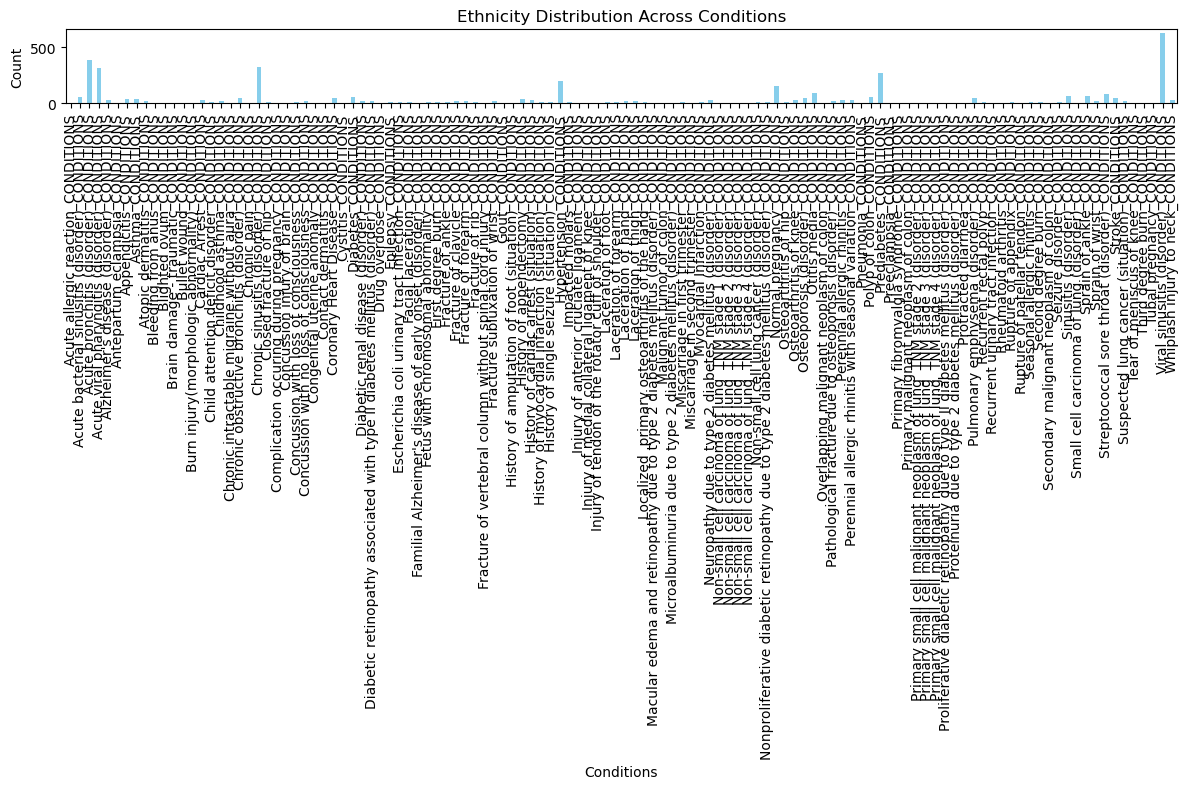

In [9]:
# Assuming your data is stored in a DataFrame named df

df = lungs

# Extracting ethnicity columns
ethnicity_columns = [col for col in df.columns if '_CONDITIONS' in col]

# Summing up ethnicity across conditions
ethnicity_counts = df[ethnicity_columns].sum()

# Plotting
plt.figure(figsize=(12, 8))
ethnicity_counts.plot(kind='bar', color='skyblue')
plt.title('Ethnicity Distribution Across Conditions')
plt.xlabel('Conditions')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
